In [1]:
from src.functions import *

**Problema 2:** Sistemas biestáveis, como reações químicas em equilíbrio ou certos tipos de circuitos biológicos, frequentemente apersentam potenciais com múltiplos mínimos. Um exemplo clássico é o potencial

$$
V(x) = x^4 - 4x^2
$$

que possui dois mínimos estáveis e uma barreira entre eles. A dinâmica de uma partícula sujeita a este potencial, na presença de ruído térmico, pode ser descrita pela *equação de Langevin*, tipicamente escrita na forma unidimensional como:

$$
\frac{dx}{dt} = \frac{1}{\gamma} \frac{dV}{dx} + η(t),
$$

onde $\gamma$ é o coeficiente de amortecimento e $\eta(t)$ é um ruído Gaussiano com média zero e correlação ⟨$\eta(t)\eta(t')$⟩ $ = 2D\gamma(t − t′)$.

**(a)** Mostre que *no equilíbrio*, a distribuição de probabilidade estacionária da posição da partícula é a distribuição de Boltzmann:

$$
P_{eq}(x) \sim e^{−βV(x)} ,
$$

com $\beta = 1/k_BT$.

**(b)** Ao invés de tentar resolver a equação de Langevin diretametne, utilize o algoritmo de *Metropolis* para simular um comportamento estatístico para simular o comporatamento estatístico da partícla neste potencial. Escolha uma posição inicial aleatória $x_0$. A cada passo, proponha uma nova posição
$$
x_{nova} = x + \Delta x,
$$
onde $\Delta x$ é um passo aletório, por exemplo, gerado a partir de uma distribuição uniforme ou normal. Calcule a variação do potencial:

$$
\Delta V = V(x_{nova}) - V(x)
$$
onde $V(x)$

### **Item (b)**

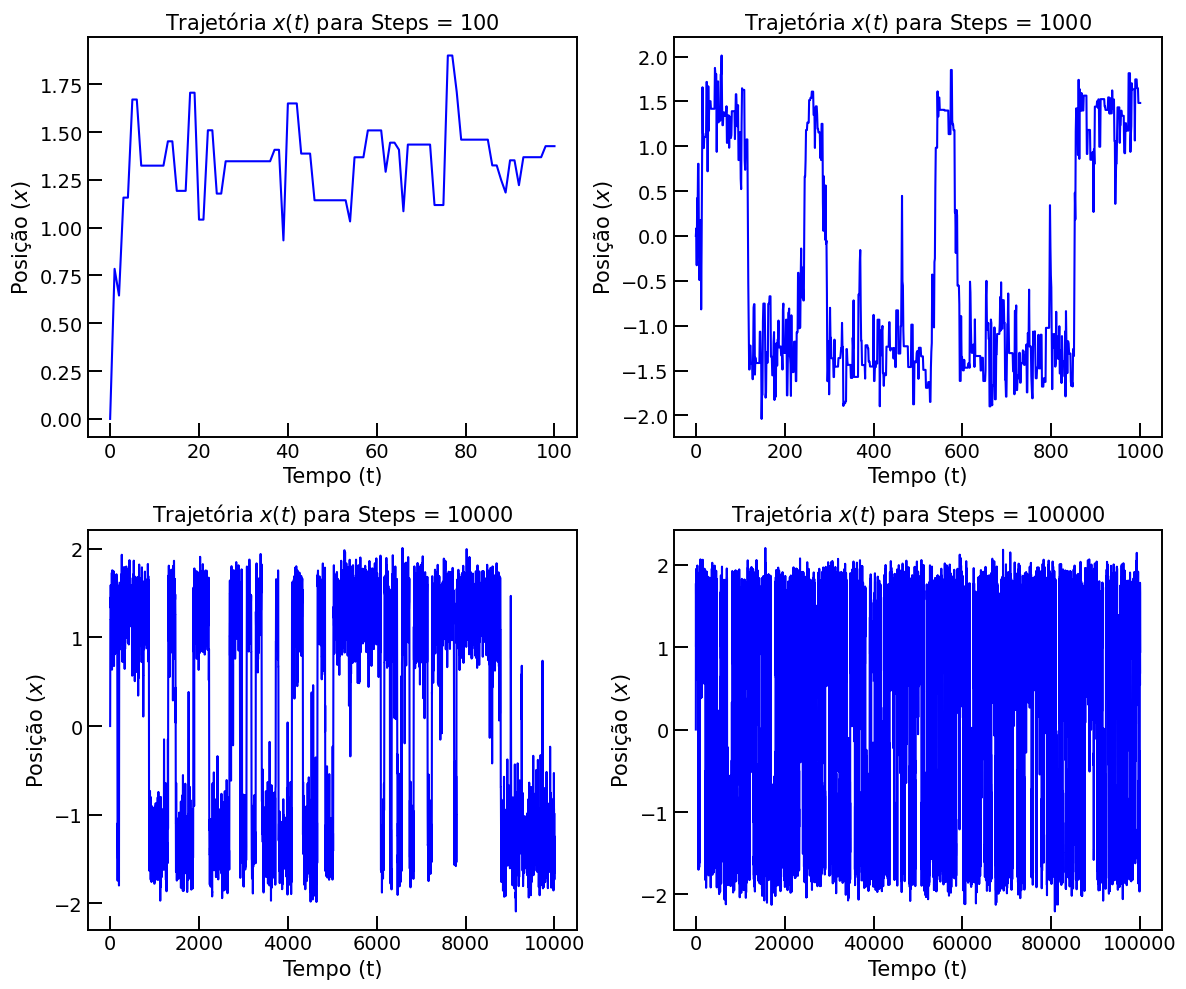

In [2]:
# Parâmetros fixos
beta = 1.0       # Inverso da temperatura (1/k_B T)
x0 = 0.0         # Posição inicial
delta = 1.0      # Amplitude máxima do passo aleatório

# Valores diferentes de steps
step_values = [100, 1000, 10000, 100000]

# Configuração do plot 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Para acessar os eixos facilmente em um loop

# Simulação e plotagem para cada número de steps
for i, steps in enumerate(step_values):
    positions = metropolis(V, x0, beta, steps, delta)
    time = np.arange(steps + 1)
    
    # Plot no subplot correspondente
    axes[i].plot(time, positions, color='blue', label=f'Steps = {steps}')
    axes[i].set_xlabel('Tempo (t)', fontsize=15)
    axes[i].set_ylabel('Posição ($x$)', fontsize=15)
    axes[i].set_title(f'Trajetória $x(t)$ para Steps = {steps}', fontsize=15)
    axes[i].tick_params('both', width=1.4, length=10, labelsize=14, direction='in')

# Ajustar layout
plt.tight_layout()
plt.savefig("results/Questão2/metropolis.pdf")
plt.show()

### **Item (c)**

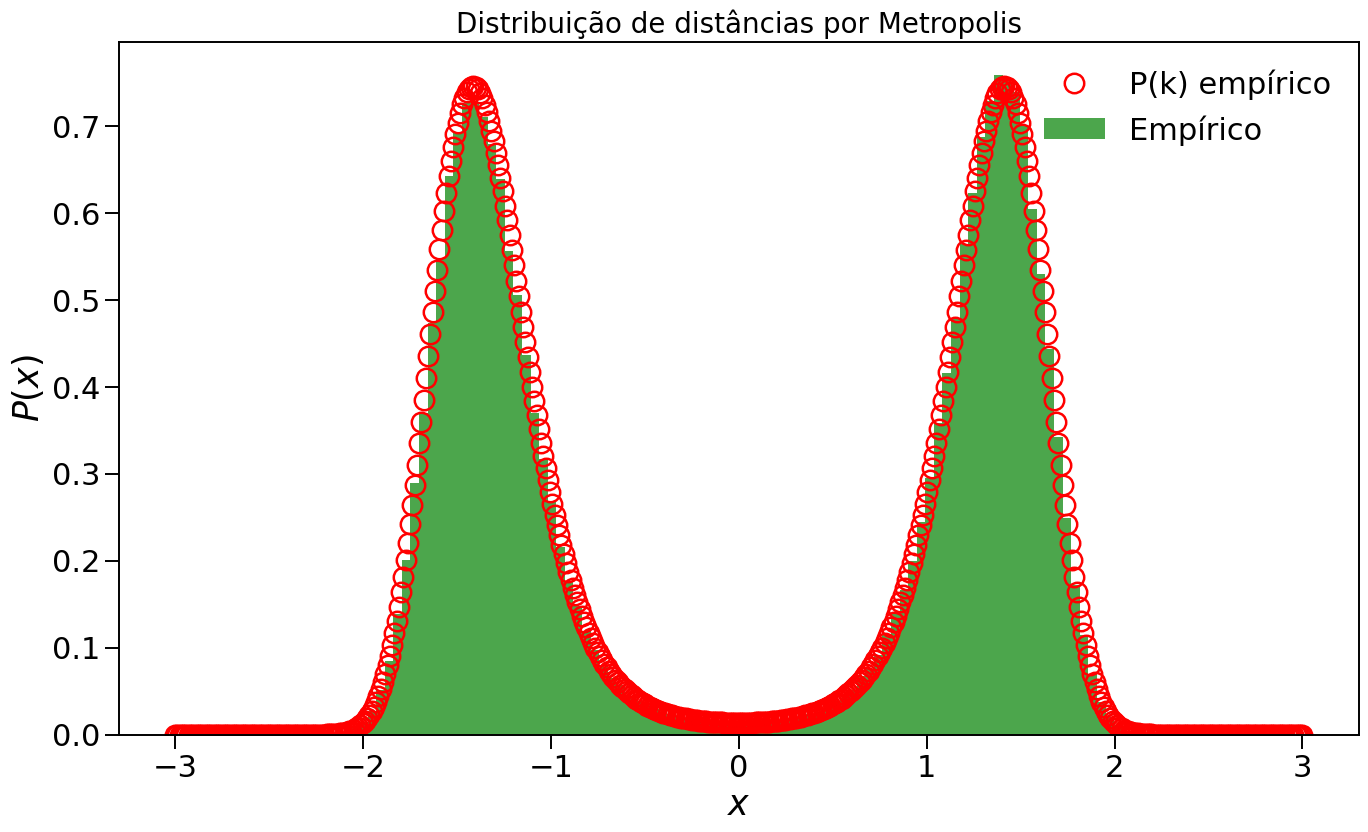

In [48]:

beta = 1.0       # Inverso da temperatura (1/k_B T)
x0 = 0.0         # Posição inicial
delta = 1.0      # Amplitude máxima do passo aleatório
steps = 1000000

positions =  metropolis(V, x0, beta, steps, delta)
# Histograma
hist, bins = np.histogram(positions, bins=100, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Distribuição teórica
x = np.linspace(-3, 3, 500)
P_theoretical = np.exp(-beta * V(x))
P_theoretical /= trapezoid(P_theoretical, x)

# Plot
fig = plt.subplots(figsize=(16, 9))
plt.bar(bin_centers, hist, width=(bins[1] - bins[0]), alpha=0.7, label="Empírico", color="green")
plt.plot(x, P_theoretical, 'o', label='P(k) empírico', mfc = "None", mec = "red", ms=14, mew=1.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Distribuição de distâncias por Metropolis", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão2/Distri_dist.pdf")
plt.show()

In [54]:
# Distribuição de Boltzmann (não normalizada)
def P_eq(x, beta):
    return np.exp(-beta * V(x))

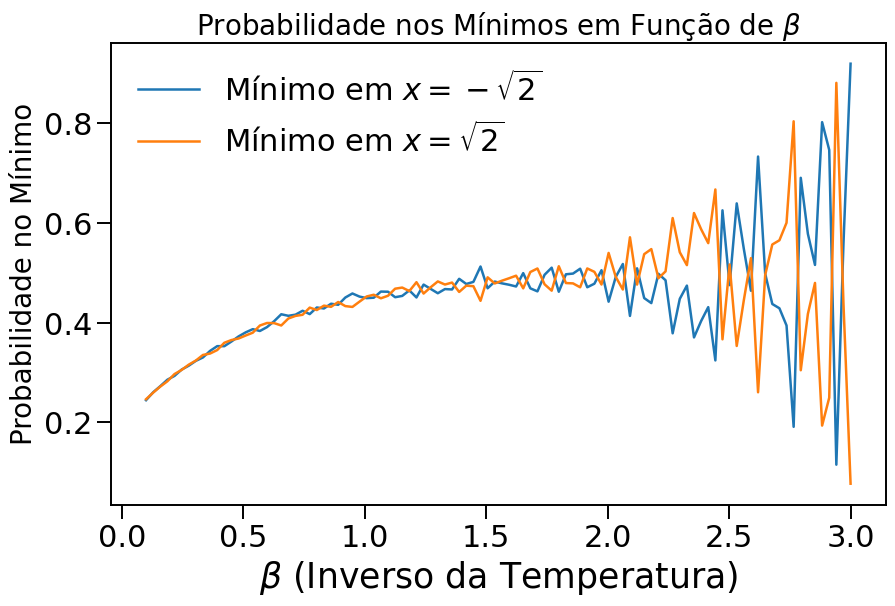

In [72]:
from scipy.integrate import quad
# Encontrar os mínimos do potencial
# Encontrar os mínimos do potencial
minimos = [-np.sqrt(2), np.sqrt(2)]  # Obtido analiticamente

# Função para calcular a probabilidade nos mínimos usando amostras
def probabilidade_minimo_amostras(positions, minimo, delta=0.5):
    """
    Calcula a probabilidade de a partícula estar em torno de um mínimo específico
    usando as amostras geradas pelo algoritmo de Metropolis.
    
    Parâmetros:
        positions (np.array): Posições da partícula ao longo do tempo.
        minimo (float): Posição do mínimo do potencial.
        delta (float): Tamanho da região ao redor do mínimo.
    
    Retorna:
        probabilidade (float): Probabilidade estimada.
    """
    return np.sum((positions > minimo - delta) & (positions < minimo + delta)) / len(positions)

# Parâmetros da simulação
betas = np.linspace(0.1, 3, 100)  # Valores de beta (inverso da temperatura)
x0 = 0.0  # Posição inicial
delta = 1.0  # Amplitude máxima do passo aleatório
steps = 10**6  # Número de passos na simulação

# Armazenar as probabilidades
probabilidades_minimos = {m: [] for m in minimos}

# Simulação para diferentes valores de beta
for beta in betas:
    positions = metropolis(V, x0, beta, steps, delta)  # Simular com Metropolis
    for minimo in minimos:
        prob = probabilidade_minimo_amostras(positions, minimo, delta=0.5)
        probabilidades_minimos[minimo].append(prob)

# Plotar os resultados

plt.figure(figsize=(10, 6))
for minimo, probs in probabilidades_minimos.items():
    if (minimo < 0):
        plt.plot(betas, probs, linewidth=1.8, label=fr'Mínimo em $x = -\sqrt{{2}}$')
    else:
        plt.plot(betas, probs, linewidth = 1.8, label=fr'Mínimo em $x = \sqrt{{2}}$')


plt.title('Probabilidade nos Mínimos em Função de $\\beta$', fontsize=20)
plt.xlabel(r'$\beta$ (Inverso da Temperatura)', size=25)
plt.ylabel('Probabilidade no Mínimo', fontsize=20)

plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.savefig("results/Questão2/minimum_vs_beta.pdf")
plt.show()

## **Item (d)**

In [ ]:
# Conjunto de N temperaturas igualmente espaçadas no intervalo [β0, βF]
β0, βF, N = 0.0, 5.0, 1000
β = np.linspace(β0, βF, N)
x0 = 0.0         # Posição inicial
delta = 1.0      # Amplitude máxima do passo aleatório
steps = 1000000
for b in β:
    # Os dois mínimos do potencial V estão em x_min = ± √2
    positions =  metropolis(V, x0, beta, steps, delta)
    # Histograma
    hist, bins = np.histogram(positions, bins=100, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Distribuição teórica
    x = np.linspace(-3, 3, 500)
    P_theoretical = np.exp(-beta * V(x))
    P_theoretical /= trapezoid(P_theoretical, x)
    

In [52]:
beta = 1.0       # Inverso da temperatura (1/k_B T)
x0 = 0.0         # Posição inicial
delta = 1.0      # Amplitude máxima do passo aleatório
steps = 1000000

positions =  metropolis(V, x0, beta, steps, delta)
# Histograma
hist, bins = np.histogram(positions, bins=100, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Distribuição teórica
x = np.linspace(-3, 3, 500)
P_theoretical = np.exp(-beta * V(x))

# Normalizando a distribuição
P_norm = [float(p / sum(P_theoretical)) for p in P_theoretical]

In [43]:

#β0, βF, N = 0.0, 5.0, 1000
#β = np.linspace(β0, βF, N)
β = 2.0
x0 = 0.0         # Posição inicial
delta = 1.0      # Amplitude máxima do passo aleatório
steps = 1000000
positions =  metropolis(V, x0, β, steps, delta)
# HistogramaP_theoretical:-1] + bins[1:]) / 2

# Distribuição teórica
x = np.linspace(-5, 5, 1000000)
P_theoretical = np.exp(-beta * V(x))
normalization_factor = sum(P_theoretical)
P_theoretical /= normalization_factor